# 120 Years of Olympics History : Athletes and Results

<img src="https://github.com/KavitaKusagur/Machine-Learning-EDA/blob/master/images/rio_olympic.png?raw=true" width="240" height="360" title="Rio Olympics"/>      



# Exploratory Data Analysis (EDA)                                          
                                
                                                                                                Author: Kavita Kusagur


### Table of Contents
- 1. [Problem Statement](#section1)<br/>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)<br/>
- 3. [Data profiling](#section3)<br/>
    - 3.1 [athletes dtypes](#section301)<br/>
    - 3.2 [athletes head](#section302)<br/>
    - 3.3 [athletes describe](#section303)<br/>
    - 3.4 [athletes info](#section304)<br/>
    - 3.5 [NOC head](#section305)<br/>
    - 3.6 [Joing the dataframes](#section306)<br/>
    - 3.7 [Pandas profiling](#section307)<br/>
    - 3.8 [Initial observations](#section308)<br/>
    - 3.9 [Final observations](#section309)<br/>
- 4. [Data normalization](#section4)<br/>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Missing Values](#section402)<br/>
    - 4.3 [Missing Value Treatment](#section403)<br/>
    - 4.4 [Handling NaN data in categorical variables](#section404)<br/>            
- 5. [Identify patterns in the data](#section5)<br/>
    - 5.1 [Age vs Medal](#section501)<br/>
    - 5.2 [Gender Vs Medal](#section502)<br/>
    - 5.3 [Medal Vs Country](#section503)<br/>
    - 5.4 [Athletes Count Vs Region](#section504)<br/>
    - 5.5 [Disciplines with the greatest number of Gold Medals](#section505)<br/>
    - 5.6 [Using Donut chart to check the relationship between Gender and Medal](#section506)<br/>
- 6. [Analysis through questions](#section6)<br/>
     - 6.1 [How the proportion of Men/Women varied with time?](#section601)<br/>
         - 6.1.1 [What is the variation of Male/Female athletes over time (Summer Games)?](#section601)<br/>
         - 6.1.2 [What is the variation of age along time?](#section602)<br/>
         - 6.1.3 [What  is the variation of weight along time?](#section603)<br/>
         - 6.1.4 [What  is the variation of height along time ?](#section604)<br/>
         - 6.1.5 [What is the median height/weight of an Olympic medalist?](#section605)<br/>
     - 6.2 [How much medals we have only for women in the recent history of the Summer Games ?](#section606)<br/>   
     - 6.3 [How the number of athletes/countries varied along time ?](#section607)<br/>
     - 6.4 [What is the variation of height/weight along time for particular disciplines ?](#section608)<br/>
         - 6.4.1 [Gymnastics](#section609)<br/>
         - 6.4.2 [Weightlifting](#section610)<br/>
- 7. [Conclusion](#section7)<br/>
- 8. [Actionable Insights](#section8)<br/>

<a id="section0"></a>

<a id="section1"></a> 
## 1. Problem Statement 


<img src="https://github.com/KavitaKusagur/Machine-Learning-EDA/blob/master/images/olympic-medal.jpg?raw=true" width="540" height="360" title="Olympic Medal"/>  

<a id="section1"></a> 

"This is a historical dataset on the modern Olympic Games, including all the __Games from Athens 1896 to Rio 2016__."
<a id="section101"></a> 
### 1.1. Introduction
The creation of modern Olympic Games was inspired by the ancient Olympic Games, which can be traced back to 776 BC. They were dedicated to the Olympian gods and were staged on the ancient plains of Olympia. They continued for nearly 12 centuries, until Emperor Theodosius decreed in 393 A.D. that all such "pagan cults" be banned.

The Olympic Games are the leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are held every four years, with the Summer and Winter Games alternating by occurring every four years but two years apart.

In this kernel, my goal is to show how the Olympic Games have developed over the years, changing participation trends, physical winning characteristics, geographic participation trends, special cases of interest, et al.

The data was scrapped by Randi H Griffin from www.sports-reference.com



<a id="section102"></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "120 years of Olympic history: athletes and results"
- __Sponsoring Organization__: www.sports-reference.com
- __Year__: 1896 - 2016
- __Description__: "Basic bio data on athletes and medal results from Athens 1896 to Rio 2016. 


The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are the following:

### Dataset Content

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA.

<a id="section2"></a> 
### 2. Load the packages and data 

In [4]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt                                                             

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 15 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

athlete = pd.read_csv("https://raw.githubusercontent.com/KavitaKusagur/Machine-Learning-EDA/master/athlete_events.csv")             # Load in the dataset as athlete
noc = pd.read_csv("https://raw.githubusercontent.com/KavitaKusagur/Machine-Learning-EDA/master/noc_regions.csv")                    # Load the dataset as noc

<a id="section3"></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [8]:
print('Athlete data: \nRows: {}\nCols: {}'.format(athlete.shape[0],athlete.shape[1]))
print(athlete.columns)

print('\nNOC data: \nRows: {}\nCols: {}'.format(noc.shape[0],noc.shape[1]))
print(noc.columns)

Athlete data: 
Rows: 271116
Cols: 15
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

NOC data: 
Rows: 230
Cols: 3
Index(['NOC', 'region', 'notes'], dtype='object')


<a id="section301"></a> 

In [3]:
athlete.dtypes                                                                    # Display the data type for each variable

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

<a id="section302"></a> 

In [9]:
athlete.head()                                                              # Display the first five rows of the data set

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<a id="section303"></a>

In [13]:
athlete.describe()                                                    # Descriptive statistics for the numerical variables

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


#### Observations

As we can see there is a such no discrepancies dataset. But _'Age', 'Height' & 'Weight'_ columns have _'NA'_ values, we will handle these in __section ()__ without removing them (as it's not best idea and also removing these values impacts on the dataset). 

<a id="section304"></a> 

In [15]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<a id="section305"></a> 

In [14]:
noc.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


<a id="section306"></a>

<a id="section306"></a> 
### 3.1. __Joining the dataframes__

In [10]:
#We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function.

merged_df = pd.merge(athlete, noc, on='NOC', how='left')

In [9]:
#Now let's see the result
merged_df.head(5)                                                              # Displays top 5 rows from the data set

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


<a id="section307"></a> 

<a id="section307"></a>
### Pandas Profiling

In [4]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         

profile = pandas_profiling.ProfileReport(merged_df)
profile.to_file(outputfile="olympics_before_processing.html")                # HTML file will be downloaded to your workspace

<a id="section308"></a> 
### 3.3. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Age</strong> (integer)
 - <em>Numeric</em>: <strong>Height</strong> (integer)
 - <em>Numeric</em>: <strong>ID</strong> (integer)
 - <em>Object</em>: Everything else
 - <strong>City</strong> has 42 distinct responses.
 -<em>Numeric</em>: <strong>Weight</strong> (integer)
 
- The following variables have null values that may need to addressed.
 - <strong>Age</strong>: There are 9474 missing values. 
 - <strong>Height</strong>: There are 60171 missing values.
 - <strong>Medal</strong>:  There are 231333  missing values. 
 - <strong>Weight</strong>: There are 62875 missing values. 
     - The values for the columns 'Age', 'Height' and 'Weight' may not be recorded.
     - The missing values of 'Medal' column might be actually 'No medal won' in that event by the athlete.
- 2 out of 3 columns in NOC dataset contains missing values - __region__ and __notes__.
 - <strong>notes</strong>: There are 266077 missing values. This is an optional field.


#### Explore the numeric variable Weight to confirm whether all values are within a reasonable range and if any are NaN.

In [7]:
print("'Weight'")                                                                
print("Minimum value: ", merged_df["Weight"].min())
print("Maximum value: ", merged_df["Weight"].max())
print("How many values are NaN?: ", pd.isnull(merged_df['Weight']).sum())


'Weight'
Minimum value:  25.0
Maximum value:  214.0
How many values are NaN?:  62875


In [11]:
merged_df.Weight.max()

a = merged_df.Weight[merged_df.Weight > 214]
b = merged_df.Weight[merged_df.Weight < 10]
print(a)
print(b)
print(merged_df[(merged_df.Weight > 214)].count()['Weight'])


Series([], Name: Weight, dtype: float64)
Series([], Name: Weight, dtype: float64)
0


#### Count the number of distinct responses and list them.

In [14]:
print("Count of distinct responses for Sport:", len(set(merged_df['Sport'])))      # Learn more about the variable Sport, which appears not to be standardized with 66 distinct responses.
print("Distinct responses for Sport:", set(merged_df['Sport']))                    

Count of distinct responses for Sport: 66
Distinct responses for Sport: {'Triathlon', 'Short Track Speed Skating', 'Cycling', 'Swimming', 'Wrestling', 'Shooting', 'Figure Skating', 'Cross Country Skiing', 'Cricket', 'Basketball', 'Volleyball', 'Water Polo', 'Alpinism', 'Snowboarding', 'Military Ski Patrol', 'Luge', 'Hockey', 'Motorboating', 'Alpine Skiing', 'Taekwondo', 'Handball', 'Synchronized Swimming', 'Diving', 'Lacrosse', 'Modern Pentathlon', 'Tennis', 'Rowing', 'Tug-Of-War', 'Croquet', 'Skeleton', 'Racquets', 'Sailing', 'Golf', 'Rhythmic Gymnastics', 'Gymnastics', 'Curling', 'Biathlon', 'Canoeing', 'Badminton', 'Nordic Combined', 'Jeu De Paume', 'Equestrianism', 'Judo', 'Freestyle Skiing', 'Fencing', 'Baseball', 'Football', 'Rugby Sevens', 'Athletics', 'Polo', 'Ski Jumping', 'Softball', 'Speed Skating', 'Beach Volleyball', 'Table Tennis', 'Bobsleigh', 'Basque Pelota', 'Trampolining', 'Rugby', 'Aeronautics', 'Roque', 'Boxing', 'Archery', 'Weightlifting', 'Ice Hockey', 'Art Compet

In [12]:
print("Count of distinct responses for Team:", len(set(merged_df['Team'])))      # Learn more about the variable Team, which appears not to be standardized with 66 distinct responses.
print("Distinct responses for Team:", set(merged_df['Team'])) 

Count of distinct responses for Team: 1184
Distinct responses for Team: {'Olen', 'Thailand', 'Austria-1', 'Crocodile-13', 'Buscape II', 'Lady C', 'Century Boat Club-1', 'Voloira II', 'Newfoundland', 'Inga-Lill XXXXIII', 'Titia', 'New York Turnverein, New York', 'Latvia-1', 'Seawanhaka Boat Club-1', 'Saudi Arabia', 'Galt Football Club', 'Souriceau-38', 'Cambodia', 'Italy-3', 'Tichiboo', 'United States-4', 'Macky VI', 'Freia-5', 'Angelita', 'Mouchette-2', 'Central African Republic', 'Mauritius-2', 'Hojwa', 'West Germany-2', 'Gyp-23', 'Singapore', 'Great Britain-4', 'Lemzos Thorichton "Psara"-3', 'Myanmar', 'British Virgin Islands', 'Pirouette-31', 'Hatuey', 'Roddklubben af 1912-2', 'Japan-1', 'Serbia', 'Berliner Ruderclub', 'Cercle Nautique de Reims-4', 'Kristiania Roklub-1', 'St. Louis Southwest Turnverein #2-3', 'Suzon IV-5', 'Czechoslovakia-3', "Cercle de l'Aviron Roubaix-4", 'Kazakhstan', 'Kuwait', 'Germany-3', 'Carabinier-15', 'Milwaukee Athletic Club-1', 'Western Golf Association-1

<a id="section309"></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
 - It will be important to decide how to handle NaN values.
 
 - We will handle Nan values for columns _'Age', 'Height', 'Weight' and 'Medal'_ in further sections.
     - At this point, we can act as follows:

        1. Using only the rows that has a value in the _'Height'_ and _'Weight'_ columns.
        2. Replace the value with the mean of the column.

        Solution 2 in my opinion, it is not the best way to go: we are talking about data of athletes of different ages and different disciplines (that have done different training).

So we'll create a dataframe filtering only the rows that has the column Height and Weight populated. __(Done in section  ---)__ 


<a id="section4"></a> 
### 4. Data Normalization

<a id="section401"></a>

<a id="section401"></a> 
### 4.1. Standardize all column headers to lower case 

In [11]:
# map() function returns a list of results after applying the given function to each item of a given iterable.
merged_df.columns = map(str.lower, merged_df.columns)                                  
                                                                         
merged_df.dtypes                                       # Confirm that all variable names are now lower case


id          int64
name       object
sex        object
age       float64
height    float64
weight    float64
team       object
noc        object
games      object
year        int64
season     object
city       object
sport      object
event      object
medal      object
region     object
notes      object
dtype: object

<a id="section402"></a>
### 4.2. Missing Values 



In [14]:
#missing data for athlete 

print("Missing _Data :\n")
for x in athlete.columns:
    if athlete[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,athlete[x].isnull().values.ravel().sum()))

#missing data for noc
for x in noc.columns:
    if noc[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,noc[x].isnull().values.ravel().sum()))
               


Missing _Data :

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 3
notes - 209


<a id="section403"></a>
### 4.3. Missing Value Treatement

We can see that we have _NaN_ values both in _'Height'_ and _'Weight'_ columns, irrespective of winning the medal in olympics  and these fields are neccessary in analysis.

<a id="section401"></a>

In [12]:
#dealing with missing data
#Let’s get rid of the variable "notes”, just to make our lives easier.
merged_df = merged_df.drop(['notes'], axis= 1)

merged_df.head(5)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


<a id="section"></a>

For the purpose of this analysis, imply take _ONLY_ the values that are different from NaN. 

In [13]:
# checking the number of minimum, maximum and Nan Values

print("'Age'")
print("Minimum value: ", merged_df["age"].min())
print("Maximum value: ", merged_df["age"].max())
print("How many values are NaN?: ", pd.isnull(merged_df['age']).sum())

print("\n'Weight'")                                                          
print("Minimum value: ", merged_df["weight"].min())
print("Maximum value: ", merged_df["weight"].max())
print("How many values are NaN?: ", pd.isnull(merged_df['weight']).sum())

print("\n'Height'")
print("Minimum value: ", merged_df["height"].min())
print("Maximum value: ", merged_df["height"].max())
print("How many values are NaN?: ", pd.isnull(merged_df['height']).sum())


'Age'
Minimum value:  10.0
Maximum value:  97.0
How many values are NaN?:  9474

'Weight'
Minimum value:  25.0
Maximum value:  214.0
How many values are NaN?:  62875

'Height'
Minimum value:  127.0
Maximum value:  226.0
How many values are NaN?:  60171


<a id="section"></a>

In [14]:
merged_df['age_Group'] = pd.cut(merged_df['age'].dropna(),
                         [0,18,25,35,45,55,99],
                         labels=['<18','18-24','25-34','35-44','45-54','55+'], include_lowest=True)


<a id="section"></a> 

<a id="section4032"></a> 
#### Question that comes up:


#### How does __age__ relate to various attributes of olympics?    

  - __Age distribution in Winter olympic games__


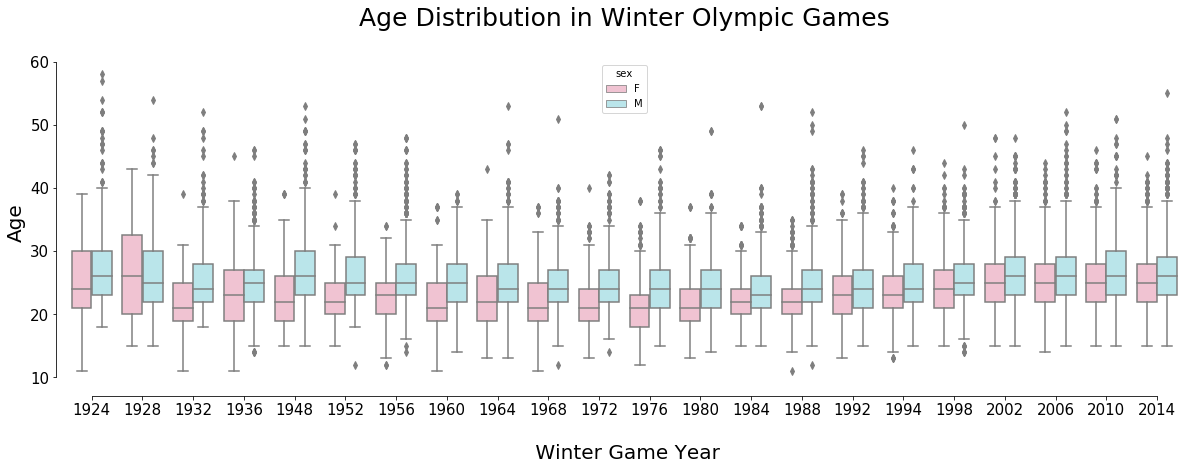

In [15]:
fig, ax = plt.subplots(figsize=(20,6))
# Draw a nested boxplot to show age dsitribution and winter games
ax = sns.boxplot(x="year", y="age", hue="sex", palette=["#F8BBD0", "#B2EBF2"], data=merged_df[merged_df['season']=='Winter'])
sns.despine(offset=10, trim=True)

ax.axes.set_title("Age Distribution in Winter Olympic Games\n",fontsize=25)
ax.set_xlabel("\n Winter Game Year",fontsize=20)
ax.set_ylabel("Age",fontsize=20)
ax.tick_params(labelsize=15)



### __Observation :__

- In Winter Olympics, average __age__ of __medal winners__ is __mostly higher__ than the non-medal winners. 
- Average age of medal winners in Winter Olympics started with around 31 levels and then hit low to 24 levels between 1980 & 1992. It has now risen to 27 levels.

<a id="section"></a>

<a id="section4031"></a>
#### Athletes Participation in Olympics

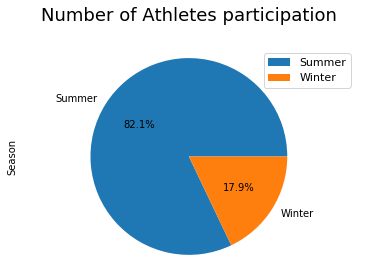

In [44]:
# Participation of athletes

season_names =['Summer', 'Winter']
athlete.Season.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Number of Athletes participation\n', size=18)
plt.legend(labels=season_names,loc="best", fontsize=11)

39783


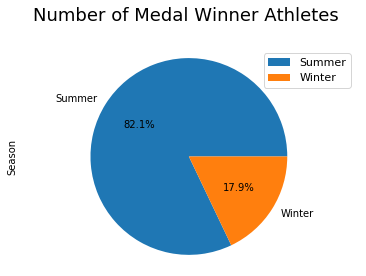

In [115]:
# Total number of medal winners in both Summer and Winter Season

#TotMed = merged_df[(merged_df.medal == 'Gold') | (merged_df.medal == 'Silver') | (merged_df.medal=='Bronze')]
#TotMed = athlete[(athlete.Medal == 'Gold') | (athlete.Medal == 'Silver') | (athlete.Medal=='Bronze')]
#TotMed = athlete[(athlete.Medal.notnull())]
TotMed = athlete[(athlete.Medal != 'NA')]
print(TotMed['Medal'].count())                 

season_names =['Summer', 'Winter']
TotMed.Season.value_counts().plot(kind='pie', autopct='%1.1f%%', subplots=True)
plt.axis('equal')
plt.title('Number of Medal Winner Athletes \n', size=18)
plt.legend(labels=season_names,loc="best", fontsize=11)


<a id="section"></a>

<a id="section403"></a>
- How does __age__ relate to various attributes of athletes?    (__Hint__ : Based on age group)

   - __Distribution of the age of total medalists__
 

 Let's start creating a new dataframe including only total medalists.

In [17]:
TotalMedals = merged_df[(merged_df.medal != 'NA')]
TotalMedals.head()


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,18-24
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,18-24
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,18-24
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,25-34
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,18-24


<a id="section302"></a> 

<a id="section4031"></a>
### Section 4.3.1

As the _'Age'_ column contains _NaN_ values, let's take only the values that are different from NaN.

In [18]:
TotalMedals = TotalMedals[np.isfinite(TotalMedals['age'])]

We can now create a countplot to see the result of our work:

Text(0, 0.5, 'Medal Count')

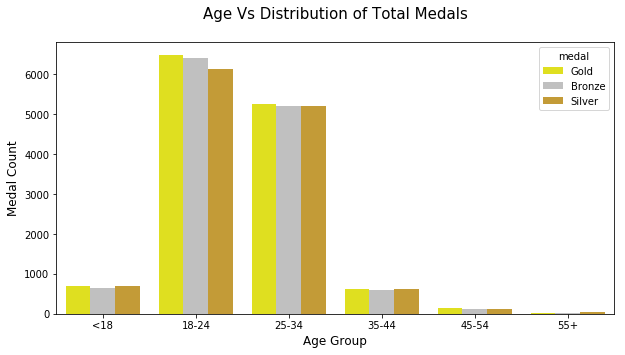

In [10]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
colours = ["yellow","silver","Goldenrod"]
ax = sns.countplot(x="age_Group", hue="medal", data=TotalMedals, palette=colours)
plt.title('Age Vs Distribution of Total Medals\n',fontsize=15)
ax.set_xlabel("Age Group", size=12)
ax.set_ylabel("Medal Count", size=12)


#### Observations:

- It can be infered from the above plot that, the __Age Group2(18-24) and 3(25-34) are heavily concious and __Ag Group 1(<18) and Age Group4 (35-44) are mildly conciuous , Age_group 4(45-54) and Age-group 5(+55) are lesser__ compared to previous about their winning Gold medals. 
- It seems that, we have people with Age greater than 55 with medals.




<a id="section401"></a>

In [36]:
merged_df.sample(10)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
48586,25040,"Jacob ""Jake"" Dalton",M,20.0,168.0,67.0,United States,USA,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,NaN,USA,18-24
146276,73407,Roberto Maggioni,M,20.0,178.0,70.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN,Italy,18-24
92884,47063,Sara Maria Hector,F,21.0,167.0,66.0,Sweden,SWE,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Downhill,NaN,Sweden,18-24
116406,58910,Sinikka Marja-Liisa Keskitalo (Leppl-),F,33.0,153.0,46.0,Finland,FIN,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's Marathon,NaN,Finland,25-34
192562,96688,Enrico Pozzo,M,23.0,169.0,70.0,Italy,ITA,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Men's Rings,NaN,Italy,18-24
97579,49387,Pius Hollenstein,M,28.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Austria,25-34
41150,21207,Pavla Chrstov,F,17.0,176.0,68.0,Czech Republic,CZE,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 400 metres Individual Medley,NaN,Czech Republic,<18
221760,111459,"Kenneth Robert ""Ken"" Sitzberger",M,19.0,177.0,70.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Diving,Diving Men's Springboard,Gold,USA,18-24
60325,30893,Wayne Dustin,M,22.0,187.0,81.0,Canada,CAN,1988 Winter,1988,Winter,Calgary,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,Canada,18-24
226487,113827,Elfriede Spiegelhauer-Uhlig,F,21.0,168.0,65.0,Germany,GER,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,Germany,18-24


<a id="section401"></a>

<a id="section"></a>
#### View the age distribution of the sample

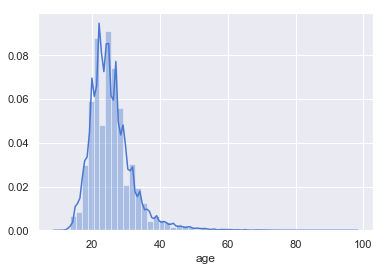

In [12]:
sns.set(color_codes=True)                               # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(merged_df["age"].dropna());

#### Observations
- Peak between _mid-20s to about mid-30s_.  

<a id="section404"></a>
### 4.4. Handling NaN data in the categorical columns
- There are two variables with many missing values. One of them points to a need to "fill in" the missing responses and other one needs to delete the column. More detail:
 - __medal__:  the missing values are likely to occur in the instances where the _athlete has not received the medal_ or _he may not won_. So, let's make an _assumtion that, Replacing the null values of a column as _No Medal_. This has not been validated.
 - __notes__:  As it's having upto 98% of missing values, and also as it doesn't hold much of importance in analysis,  dropped the column.

In [12]:
# Replacing the 'medal' values of 'NA' with 'No Medal'
merged_df['medal'] = merged_df['medal'].fillna('No Medal')

<a id="section"></a>

<a id="section406"></a>
#### Pandas profiling post data manipulation

In [41]:
import pandas_profiling
post_profile = pandas_profiling.ProfileReport(merged_df)
post_profile.to_file(outputfile="olympics_post_profiling.html")

#### Create a copy of "merged_df" dataframe for Label encoding

In [13]:
merged_df_new = merged_df.copy(deep=True)                                                       # creating new dataframe to make any datatype changes over it and keep the original dataframe as it is..

#### Dealing with Categorical Variables

In [15]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in merged_df_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    merged_df_new[i] = number.fit_transform(merged_df_new[i].astype('str'))

<a id="section406"></a>

#### Correlation of Features

In [16]:
corr=merged_df_new.corr()['medal']
corr[np.argsort(corr,axis=0)[::-1]]

medal        1.000000
age_Group    0.025677
season       0.018406
games        0.018032
year         0.016343
age          0.012432
id           0.004581
city         0.003324
sex          0.002710
name        -0.000853
weight      -0.004388
height      -0.011051
region      -0.023329
event       -0.027632
sport       -0.028168
team        -0.028723
noc         -0.031390
Name: medal, dtype: float64

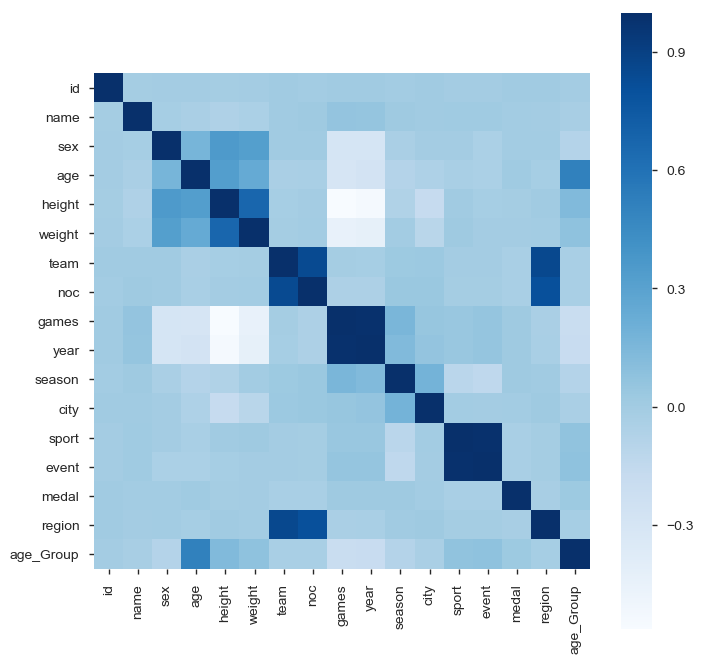

In [46]:
features_correlation = merged_df_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation

__height__, __weight__, __team__, __noc__ and __region__ are correlated with __each other__. 

<a id="section5"></a>

<a id="section5"></a>
### 5. Identify patterns in the data

<a id="section501"></a>
### 5.1. Age v. Medal

 - __Distribution of the age of gold medalists__

Let's start creating a new dataframe including only gold medalists.

In [17]:
goldMedals = merged_df[(merged_df.medal == 'Gold')]
goldMedals.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,25-34
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,25-34
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,25-34
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,25-34
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,18-24


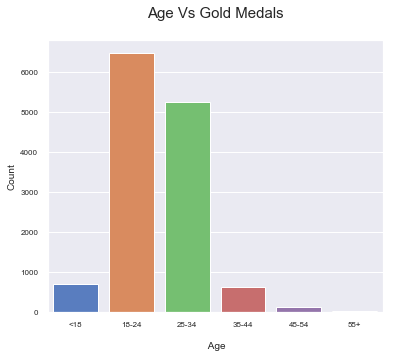

In [18]:
# We can now create a countplot to see the result of our work

plt.figure(figsize=(6, 5))
plt.tight_layout()
ax = sns.countplot(goldMedals['age_Group'])
#plt.title('Distribution of Gold Medals')

ax.axes.set_title("Age Vs Gold Medals\n",fontsize=15)
ax.set_xlabel("\n Age",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
ax.tick_params(labelsize=8)


#### Observation

- The athletes of age group 18-24 has won highest gold medals.
- It seems that we have people with _Age greater than 50_ with a __gold medal__: Let's know more about those people!

In [26]:
goldMedals['id'][goldMedals['age'] > 50].count()

65

65 people: Great! But which disciplines allows you to land a gold medal after your fifties?

We will now create a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it.

In [21]:
masterDisciplines = goldMedals['sport'][goldMedals['age'] > 50]

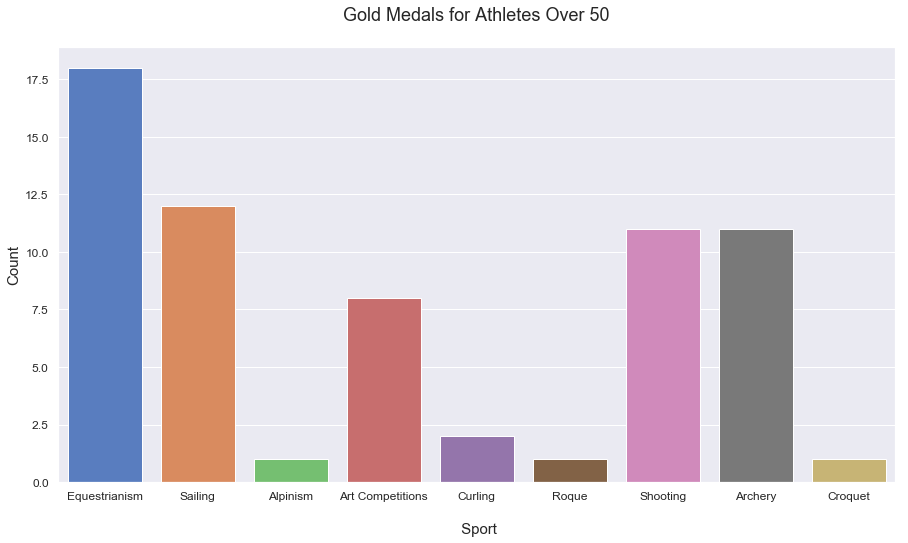

In [22]:
plt.figure(figsize=(15, 8))
plt.tight_layout()
ax = sns.countplot(masterDisciplines)

ax.axes.set_title("Gold Medals for Athletes Over 50\n",fontsize=18)
ax.set_xlabel("\n Sport",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(labelsize=12)

In [23]:
df = pd.DataFrame({'age': merged_df['age'], 'medal': merged_df['medal']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)

print("Pearson:", df_num.corr())                                                                                   # Run a correlation calculation 


Pearson:             age     medal
age    1.000000 -0.015573
medal -0.015573  1.000000


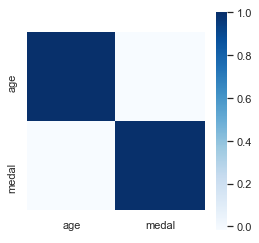

In [24]:
features = df_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()



### Observation :

- It seems that our __senior gold medalists__ are __shooters, archers, sailors and, above all, horse riders!__
- It makes sense: I cannot imagine a sprinter making 100 meters in 10 seconds at 55, but who knows!
- From above correlation, we can say "_Age is just a number !!_"


<a id="section"></a>

<a id="section502"></a>
### 5.2. Gender Vs. Medal

- Let's see how many __Gold medals won by Male & Female athletes__.

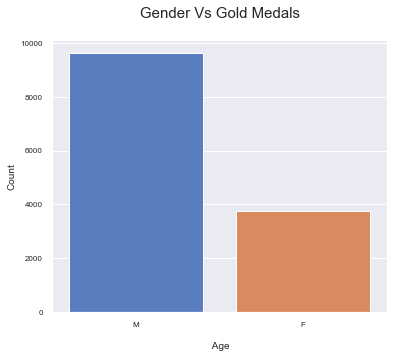

In [25]:
# We can now create a countplot to see the result of our work

plt.figure(figsize=(6, 5))
plt.tight_layout()
ax = sns.countplot(goldMedals['sex'])

ax.axes.set_title("Gender Vs Gold Medals\n",fontsize=15)
ax.set_xlabel("\n Age",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
ax.tick_params(labelsize=8)


### Obervation :

Unfortunately, there are __more Male Gold medal winners__ compared to Women. ;)

<a id="section"></a>

<a id="section503"></a>

<a id="section503"></a>
### 5.3. Medals Vs Country

Let's now review the top 5 gold medal countries:

In [33]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1.0, 'Medals per Country')

<Figure size 720x720 with 0 Axes>

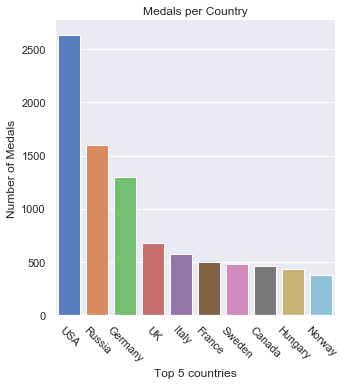

In [26]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(10)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=5, kind="bar", palette="muted")
#g.despine(left=True)
plt.xticks(rotation=-45)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

### Observation

The __USA__ seems to be the __most winning country__.

But which are the most awarded disciplines of American Athletes?

<a id="section504"></a>

<a id="section504"></a>
### 5.4. Athletes Count Vs Region

region
USA          18853
Germany      15883
France       12758
UK           12256
Russia       11692
Italy        10715
Canada        9734
Japan         8444
Sweden        8339
Australia     7724
Name: name, dtype: int64


Text(0.5, 1.0, 'Athletes Per Country\n')

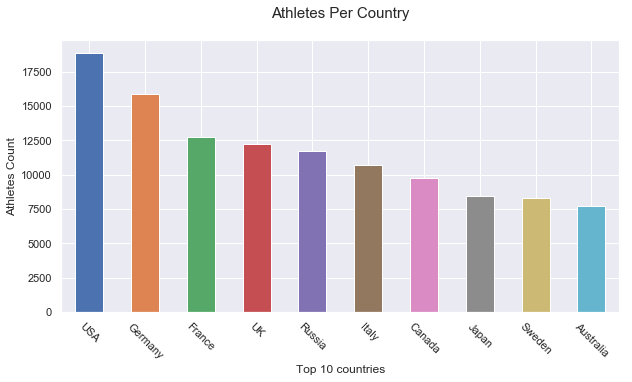

In [27]:
print(merged_df.groupby('region')['name'].count().sort_values(ascending=False)[:10])
plt.figure(figsize=(10,5))
ax= merged_df.groupby('region')['name'].count().sort_values(ascending=False)[:10].plot.bar(title="Athletes")
plt.xticks(rotation=-45)
ax.set_xlabel("Top 10 countries", size=12)
ax.set_ylabel("Athletes Count", size=12)
plt.title('Athletes Per Country\n', size=15)

### Observation :

__USA__ has __maximum number of participants__ in Olympics followed by __Germany, France__ and __UK__.

<a id="section"></a>

<a id="section505"></a>
### 5.5. Disciplines with the greatest number of Gold Medals

Let's create a dataframe to filter the gold medals only for the USA.

In [28]:
goldMedalsUSA = goldMedals.loc[goldMedals['noc'] == 'USA']

In [29]:
# Now, we can count the medals per discipline for top 5 teams:

goldMedalsUSA.event.value_counts().reset_index(name='medal').head(5)

,index,medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,108
4,Basketball Women's Basketball,95


And, of course, __basketball__ is the leading discipline!



Now, Let's plot to see our result :

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014C6AAC8>],
      dtype=object)

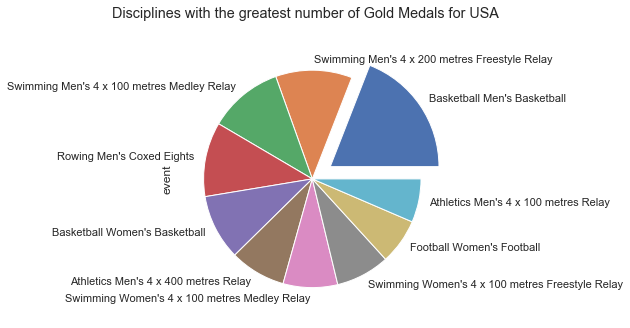

In [42]:
# make the plot

explode = [0.2,0,0,0,0,0,0,0,0,0]
#labels=['Basketball Mens Basketball','Swimming Mens 4 x 200 metres Freestyle Relay','','','Swimming Men's 4 x 100 metres Medley Relay']
goldMedalsUSA.event.value_counts()[:10].plot(kind='pie', explode=explode,subplots=True, figsize=(5,5), title="Disciplines with the greatest number of Gold Medals for USA ")
#plt.legend(labels,loc=3)


We are reviewing a list of athletes, but maybe we are counting the medal of each member of the team instead of counting the medals per team.

Let's slice the dataframe using only the data of male athletes to better review it:

In [41]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['sport'] == 'Basketball') & (goldMedalsUSA['sex'] == 'M')].sort_values(['year'])

basketballGoldUSA.head(15)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,25-34
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,25-34
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24
71407,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24
195790,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24
213368,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,25-34
219204,110112,Carl Leslie Shy,M,27.0,183.0,77.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,25-34
22390,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24


The medals are not grouped by Edition/Team but we were counting the gold medals of each member of the team!

Let's proceed grouping by year the athletes - the idea is to create a new dataframe to make a pre-filter using only the first record for each member of the team.

In [42]:
groupedBasketUSA = basketballGoldUSA.groupby(['year']).first()
groupedBasketUSA

,id,name,sex,age,height,weight,team,noc,games,season,city,sport,event,medal,region,age_Group
year,,,,,,,,,,,,,,,,
1936,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1948,101443,"Robert Lloyd Jackson ""Jack"" Robinson",M,21.0,183.0,82.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1952,58738,"Robert Earl ""Bob"" Kenney",M,21.0,188.0,84.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1956,128271,"James Patrick ""Jim"" Walsh",M,26.0,193.0,86.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,25-34
1960,13371,"Robert Lewis ""Bob"" Boozer",M,23.0,203.0,99.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1964,130843,"George ""Jiff"" Wilson",M,22.0,203.0,95.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1976,65853,"Thomas Joseph ""Tom"" LaGarde",M,21.0,208.0,97.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA,18-24
1984,120501,Wayman Lawrence Tisdale,M,20.0,205.0,118.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,18-24


In [43]:
# Let's count the records obtained

groupedBasketUSA['id'].count()

15

### Observation :

We can see, there are __15 Basketball Gold Medal athletes__ from __USA__.

<a id="section"></a>

<a id="section506"></a>
### 5.6.Using donut pie chart to see the relationship between Gender and Medal.

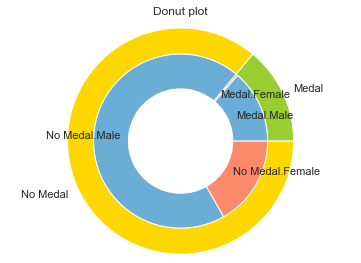

In [44]:
group_names=['Medal', 'No Medal']
group_size=[197,1211]
subgroup_names=['Medal.Male','Medal.Female','No Medal.Male','No Medal.Female']
subgroup_size=[192,5,975,236]
 
# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot\n')
# show it
plt.show()

<a id="section0"></a>

<a id="section"></a>

<a id="section6"></a>
### 6. Analysis Through  Questions


<a id="section6"></a>
### 6.1 How the proportion of Men/Women varied with time?

<a id="section601"></a>
### 6.1.1. What is the variation of Male/Female athletes over time (Summer Games) ?

We will now create two dataframes dividing the population of our dataset using _Sex_ and _Season_ (we would like to review only the summer games)

In [46]:
MenOverTime = merged_df[(merged_df.sex == 'M') & (merged_df.season == 'Summer')]
WomenOverTime = merged_df[(merged_df.sex == 'F') & (merged_df.season == 'Summer')]

In [47]:
#let's check the head of one of the new dataframes to see the result:
WomenOverTime.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,Netherlands,<18
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,No Medal,Netherlands,<18
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal,Finland,25-34
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,No Medal,Finland,25-34
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,25-34


Text(0, 0.5, 'Count')

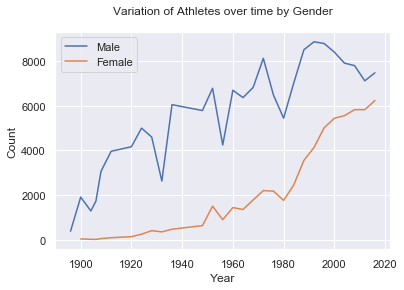

In [48]:
m_ot = MenOverTime.groupby('year')['sex'].value_counts()
w_ot = WomenOverTime.groupby('year')['sex'].value_counts()
#print(m_ot,w_ot)
m_ot.loc[:,'M'].plot(label = 'Male')
w_ot.loc[:,'F'].plot(label = 'Female')


# Create legend.
plt.legend(loc='upper left')
plt.title('Variation of Athletes over time by Gender\n')
plt.xlabel('Year')
plt.ylabel('Count')


<a id="section"></a>

### Observation:

From the above plot, we can infer that for women,
- We have a steep increase in the population.
- The grow is constant.
 
On the other hand, the grow for men seems less strong:
- After the 1990 we can see a relevant decrease in the number of male athletes at the summer games.
- The growth has slowly restarted recently.

<a id="section602"></a>
### 6.1.2. What is the variation of age for Female athletes over time?

Text(0, 0.5, 'Age')

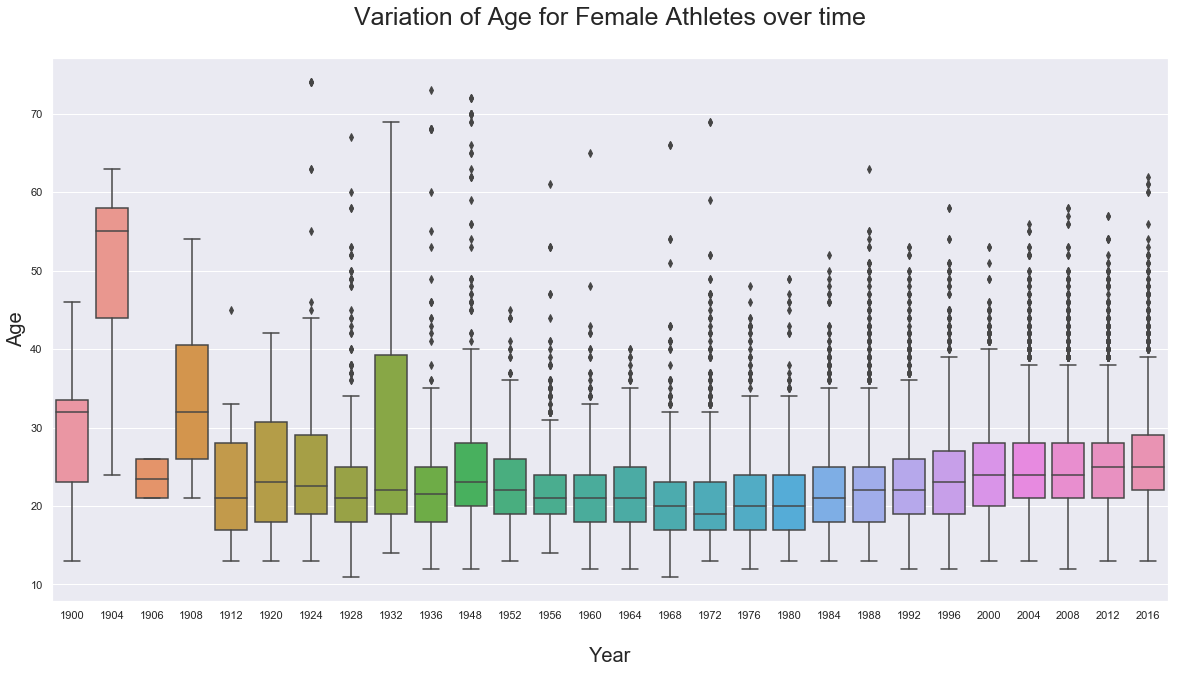

In [49]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot('year', 'age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time\n',fontsize=25)
ax.set_xlabel("\nYear", size=20)
ax.set_ylabel("Age", size=20)

<a id="section"></a>
### Observation :

- Generally, the age distribution starts has a lower minimum and a lower maximum.
- In 1904, the age distribution is strongly different from the other Olympics.

<a id="section"></a>

<a id="section603"></a>
### 6.1.3. What  is the variation of weight along time ?


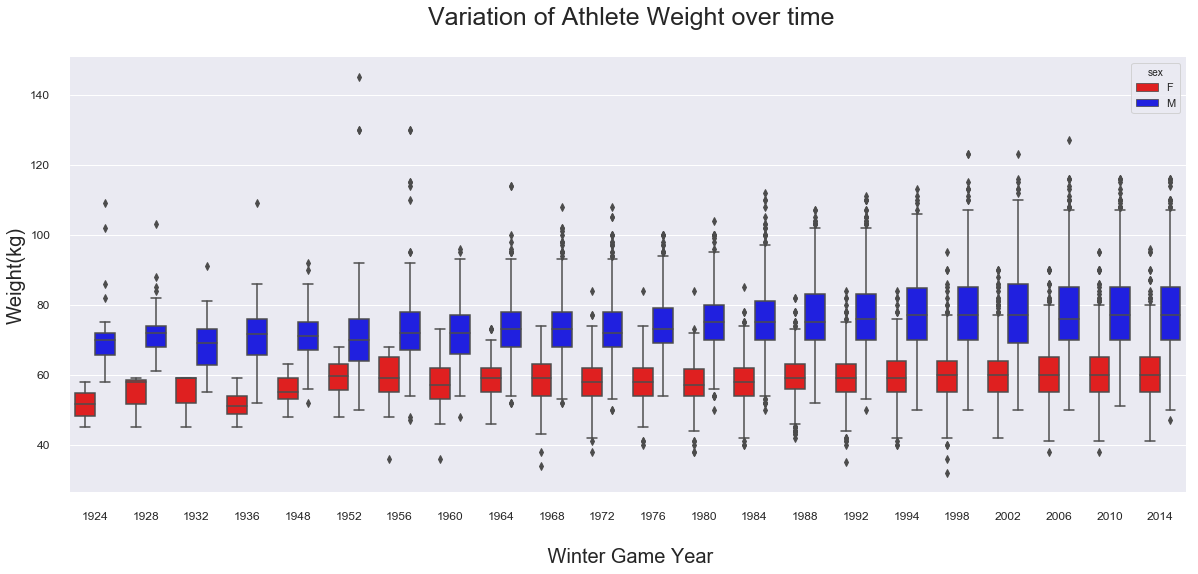

In [51]:
fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested boxplot to show age dsitribution and winter games
ax = sns.boxplot(x="year", y="weight", hue="sex", palette=["red", "blue"], data=merged_df[merged_df['season']=='Winter'])
sns.despine(offset=10, trim=True)

ax.axes.set_title(" Variation of Athlete Weight over time\n",fontsize=25)
ax.set_xlabel("\n Winter Game Year",fontsize=20)
ax.set_ylabel("Weight(kg)",fontsize=20)
ax.tick_params(labelsize=12)


### Observation :

These plots show that for both men and women, height and weight has increased gradually over the history of the Games.

<a id="section"></a>

<a id="section604"></a>
### 6.1.4. What is the variation of _Height_ over time?

Text(0.5, 1.0, 'Variation of Height for Male Athletes over time\n')

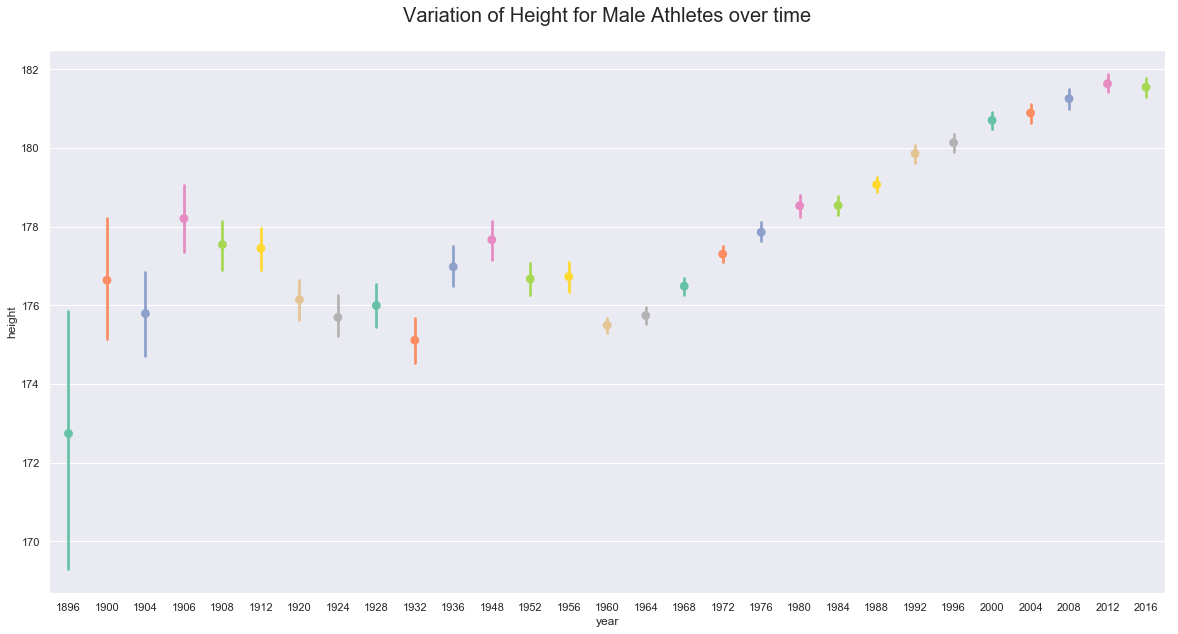

In [54]:
# plot for variation of height for male athletes
plt.figure(figsize=(20, 10))
sns.pointplot('year', 'height', data=MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time\n', size=20)

Text(0.5, 1.0, 'Variation of Height for Female Athletes over time\n')

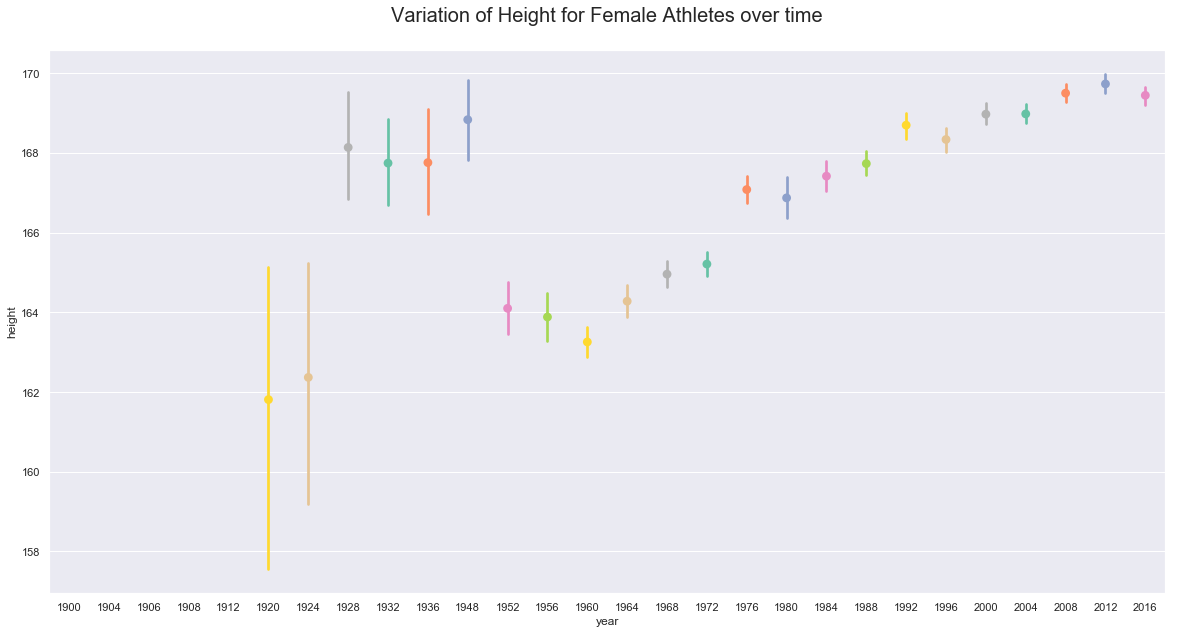

In [56]:
# plot for variation of height for female athletes
plt.figure(figsize=(20, 10))
sns.pointplot('year', 'height', data=WomenOverTime, palette='Set2')
plt.title('Variation of Height for Female Athletes over time\n',size=20)


<a id="section"></a>
### Observation:

- For both men and women, the height is incrementing over time but it is decreasing between the 2012 and the 2016.
- For women we have a peak between 1928 and 1948.

<a id="section"></a>

<a id="section605"></a>
### 6.1.5. What is the median height/weight of an Olympic medalist?

We can see that we have NaN values both in height and weight columns.

    At this point, we can act as follows:

- Using only the rows that has a value in the Height and Weight columns;
- Replace the value with the mean of the column.

Solution 2 in my opinion it is not the best way to go: we are talking about data of athletes of different ages and different disciplines (that have done different training).

Let's go with solution 1.

The first thing to do is to collect general information about the dataframe that we have to use: goldMedals.

In [110]:
goldMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13372 entries, 3 to 271076
Data columns (total 20 columns):
id              13372 non-null int64
name            13372 non-null object
sex             13372 non-null object
age             13224 non-null float64
height          10539 non-null float64
weight          10254 non-null float64
team            13372 non-null object
noc             13372 non-null object
games           13372 non-null object
year            13372 non-null int64
season          13372 non-null object
city            13372 non-null object
sport           13372 non-null object
event           13372 non-null object
medal           13372 non-null object
region          13371 non-null object
weight_clean    10254 non-null float64
age_clean       13224 non-null float64
age_Group       13224 non-null category
height_clean    10539 non-null float64
dtypes: category(1), float64(6), int64(2), object(11)
memory usage: 2.1+ MB


Okay, we have 10.000 rows now, let's create the scatterplot:

Text(0, 0.5, 'Athele Weight')

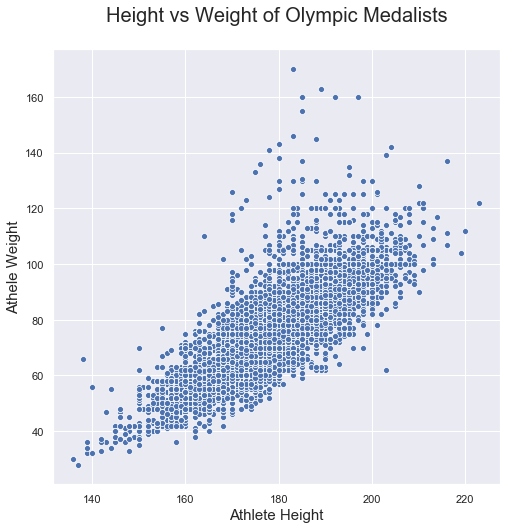

In [59]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="height", y="weight", data=goldMedals)
plt.title('Height vs Weight of Olympic Medalists\n', size=20)
ax.set_xlabel("Athlete Height", size=15)
ax.set_ylabel("Athele Weight", size=15)

### Obervation :

The __vast majority of the samples show a linear relation between height and weight__ (the more the weight, the more the height).


We have exceptions and I am willing to know more!

For example, let's see which is the athlete that weighs more than 160 kilograms

In [60]:
goldMedals.loc[goldMedals['weight'] > 160]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,18-24
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,25-34
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,25-34


__Weighlifters__: that makes sense :)

<a id="section0"></a>

<a id="section606"></a>
### 6.2. How much medals we have only for women in the recent history of the Summer Games ?

Let's create a filtered dataset:

In [62]:
womenInOlympics = merged_df[(merged_df.sex == 'F') & (merged_df.season == 'Summer')]

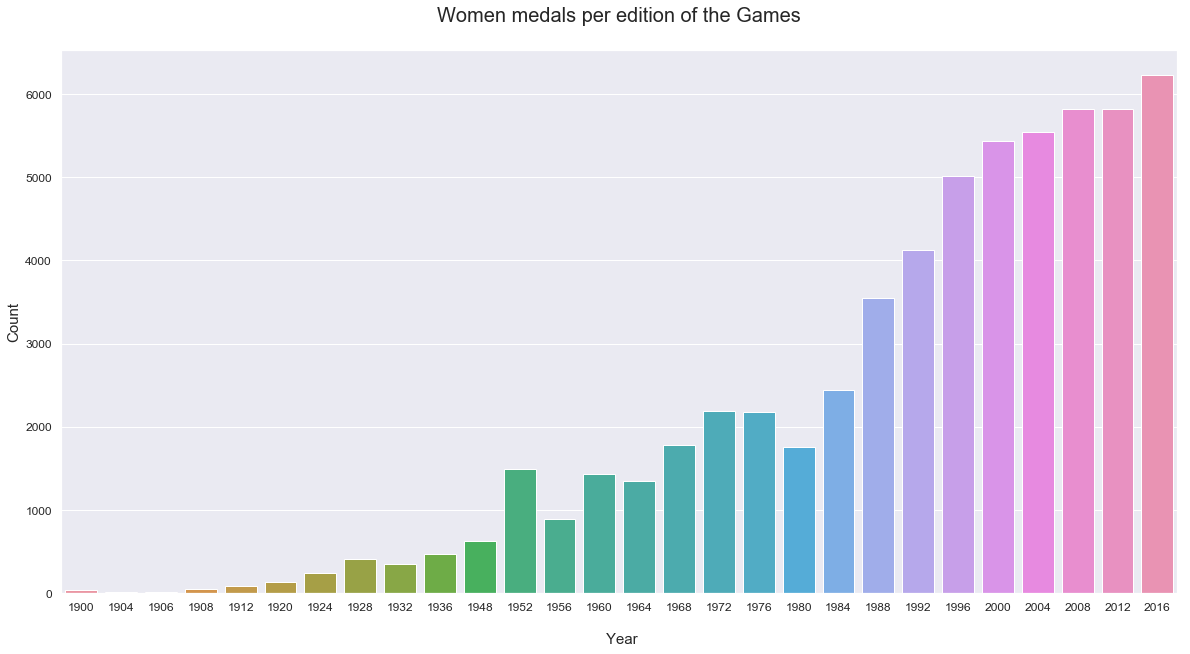

In [31]:
#let's plot to see our result

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='year', data=womenInOlympics)
plt.title('Women medals per edition of the Games\n', fontsize=20)
#ax.axes.set_title("Women medals per edition of the Games",fontsize=18)
ax.set_xlabel("\n Year",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(labelsize=12)

<a id="section"></a>

Now let's cross-check the data: below I tried to review only the medalists for the 1900 Summer edition to see if the visualization is correct.

In [63]:
womenInOlympics.loc[womenInOlympics['year'] == 1900].head(10)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,18-24
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,No Medal,USA,35-44
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,No Medal,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,25-34
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,25-34
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,No Medal,Switzerland,25-34
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,25-34
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,25-34
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",No Medal,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",No Medal,France,NaN


<a id="section"></a>

Okay, let's count the rows (same code as above adding the count() function and filtering only for ID).

In [64]:
womenInOlympics['id'].loc[womenInOlympics['year'] == 1900].count()

33

### Observation

So we have 33 records (with repetitions, for example 'Marion Jones (-Farquhar)' won a medal both for Tennis Women's Singles and Tennis Mixed Doubles - To be sure I cross-checked also with Wikipedia and the outcome seems correct).



<a id="section0"></a>

<a id="section607"></a>
### 6.3. How the number of athletes/countries varied along time ?

Let's create a sliced dataframe including only male athletes from India

In [65]:
inMenOverTime = MenOverTime.loc[MenOverTime['region'] == 'India']

In [66]:
#let's review the first rows
inMenOverTime.head(5)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,age_Group
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,No Medal,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,No Medal,India,NaN
1183,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,No Medal,India,18-24
1184,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,No Medal,India,25-34
1185,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,No Medal,India,25-34


Text(0, 0.5, '\nAthlete count')

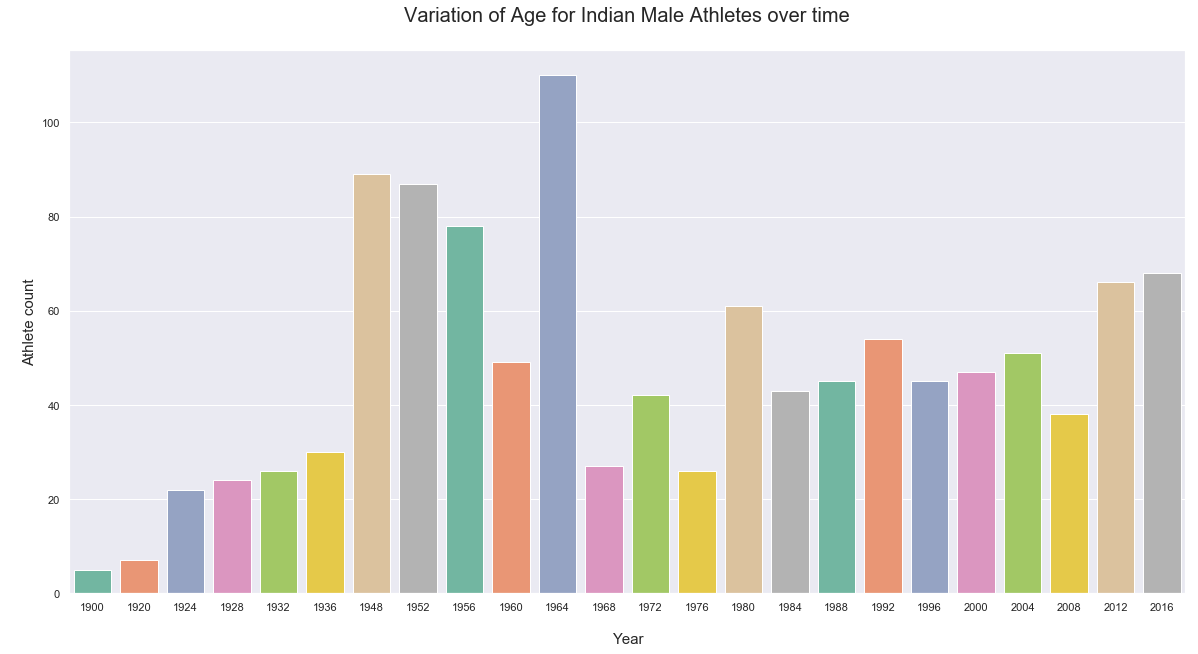

In [76]:
#Now, we can plot the change over time:

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='year', data=inMenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Male Athletes over time\n', size=20)
ax.set_xlabel("\nYear",fontsize=15)
ax.set_ylabel("\nAthlete count",fontsize=15)

We can quickly do the same operation for women:

In [72]:
inWomenOverTime = WomenOverTime.loc[WomenOverTime['region'] == 'India']

Text(0, 0.5, 'Athlete Count')

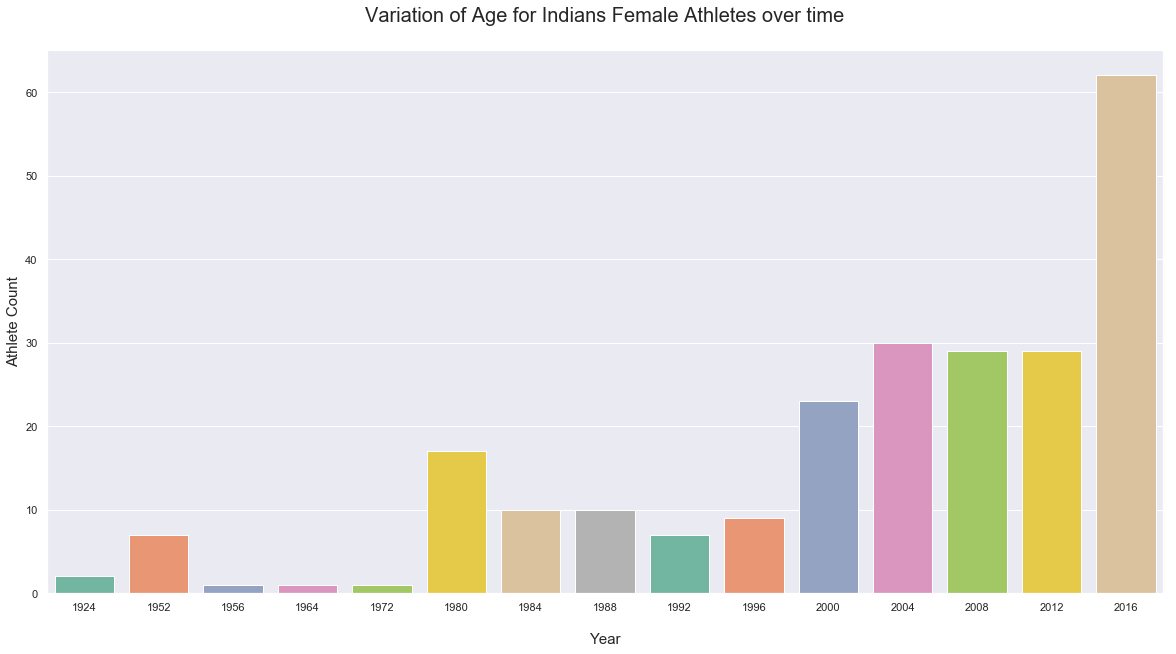

In [79]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='year', data=inWomenOverTime, palette='Set2')
plt.title('Variation of Age for Indians Female Athletes over time\n', size=20)
ax.set_xlabel("\nYear",fontsize=15)
ax.set_ylabel("Athlete Count", fontsize=15)

<a id="section0"></a>

### Observation :

What we see is that the Indian women participation is increasing, while the men participation is decreasing starting from the 2008 games.

<a id=section></a>

<a id="section608"></a>
### 6.4. What is the variation of height/weight along time for particular disciplines ?

<a id="section609"></a>
### 6.4.1. Gymnastic


Let's first of all isolate all the discipline of the Olympics dataframe

In [80]:
MenOverTime['sport'].unique().tolist()

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Swimming',
 'Badminton',
 'Gymnastics',
 'Athletics',
 'Art Competitions',
 'Wrestling',
 'Water Polo',
 'Sailing',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Weightlifting',
 'Diving',
 'Canoeing',
 'Handball',
 'Tennis',
 'Modern Pentathlon',
 'Hockey',
 'Volleyball',
 'Baseball',
 'Table Tennis',
 'Archery',
 'Trampolining',
 'Beach Volleyball',
 'Golf',
 'Rugby Sevens',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

Let's create two new dataframes for men and women for _Gymnastics_.

In [81]:
gymMenOverTime = MenOverTime.loc[MenOverTime['sport'] == 'Gymnastics']
gymWomenOverTime = WomenOverTime.loc[WomenOverTime['sport'] == 'Gymnastics']

Let's now create our plot for male and female athletes and then we can make our observations.

Text(0, 0.5, 'Athlete Weight')

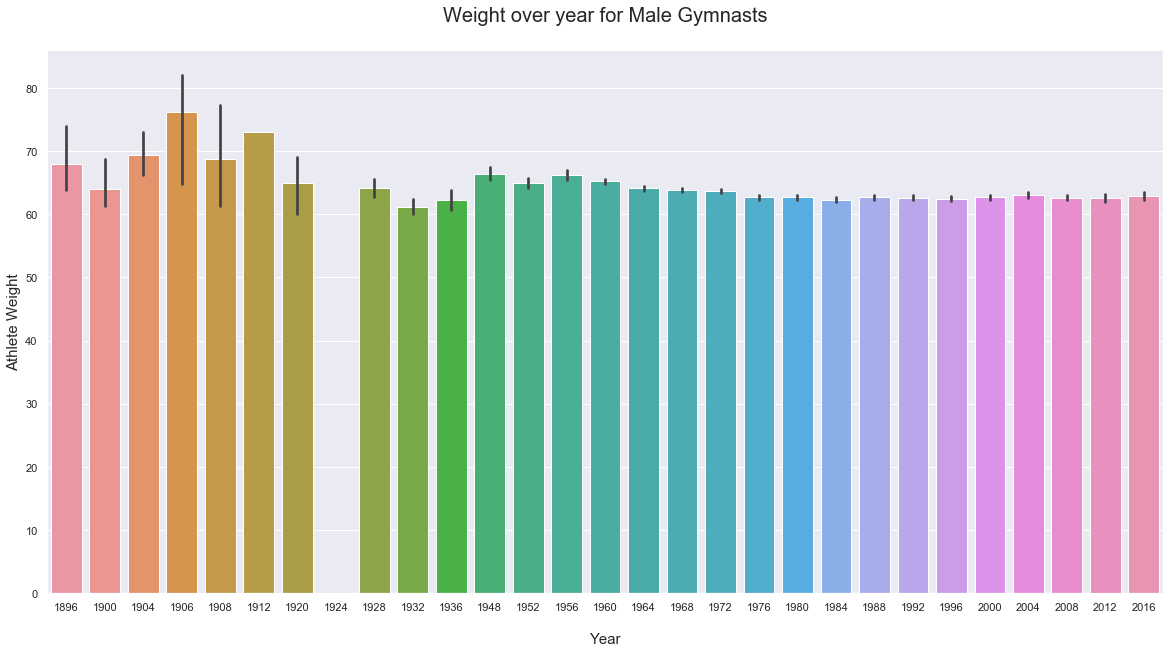

In [93]:
plt.figure(figsize=(20, 10))
ax = sns.barplot('year', 'weight', data=gymMenOverTime)
plt.title('Weight over year for Male Gymnasts\n', size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Weight", fontsize=15)

Text(21.200000000000017, 0.5, 'Athlete Height')

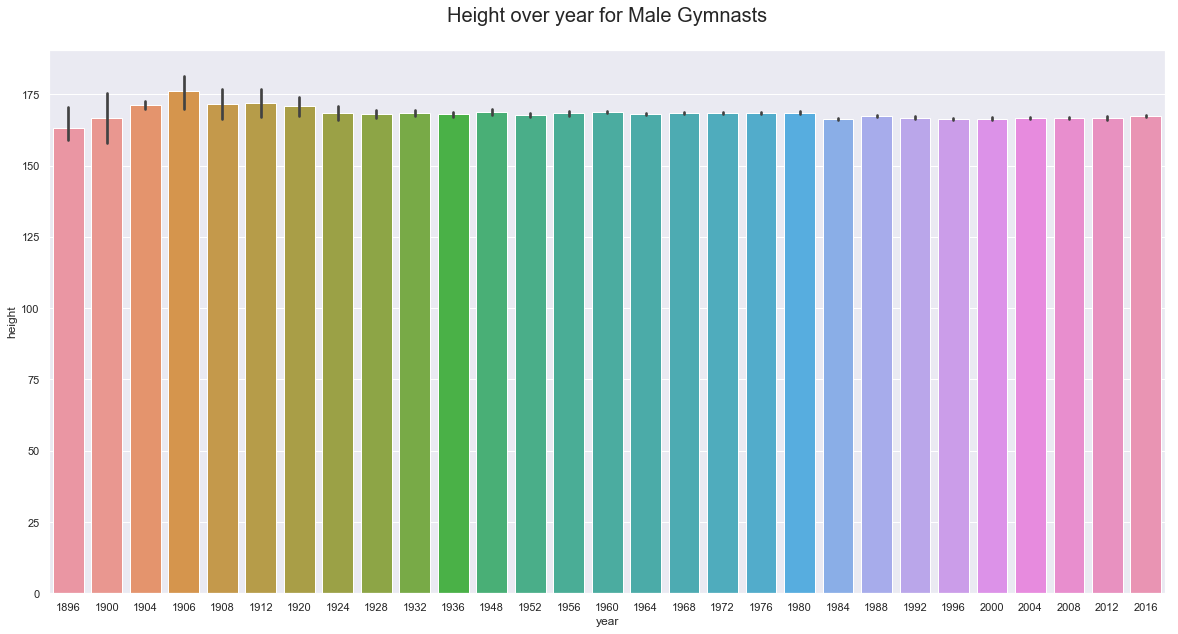

In [90]:
plt.figure(figsize=(20, 10))
sns.barplot('year', 'height', data=gymMenOverTime)
plt.title('Height over year for Male Gymnasts\n', size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Height", fontsize=15)

Text(21.200000000000017, 0.5, 'Athlete Weight')

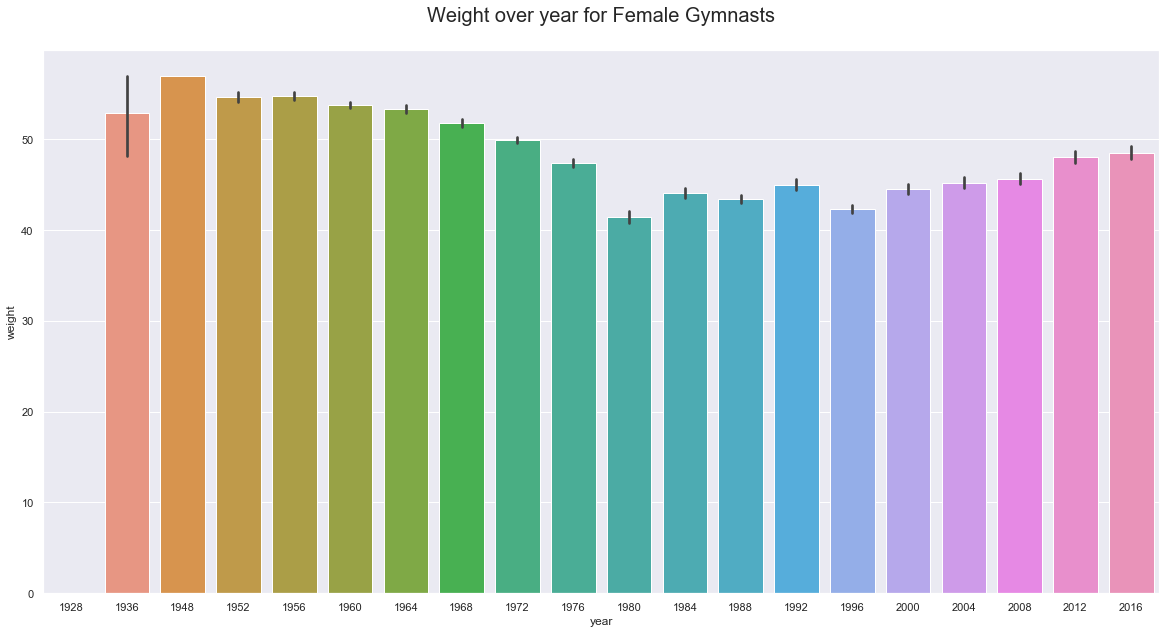

In [91]:
plt.figure(figsize=(20, 10))
sns.barplot('year', 'weight', data=gymWomenOverTime)
plt.title('Weight over year for Female Gymnasts\n',size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Weight", fontsize=15)

Text(21.200000000000017, 0.5, 'Athlete Height')

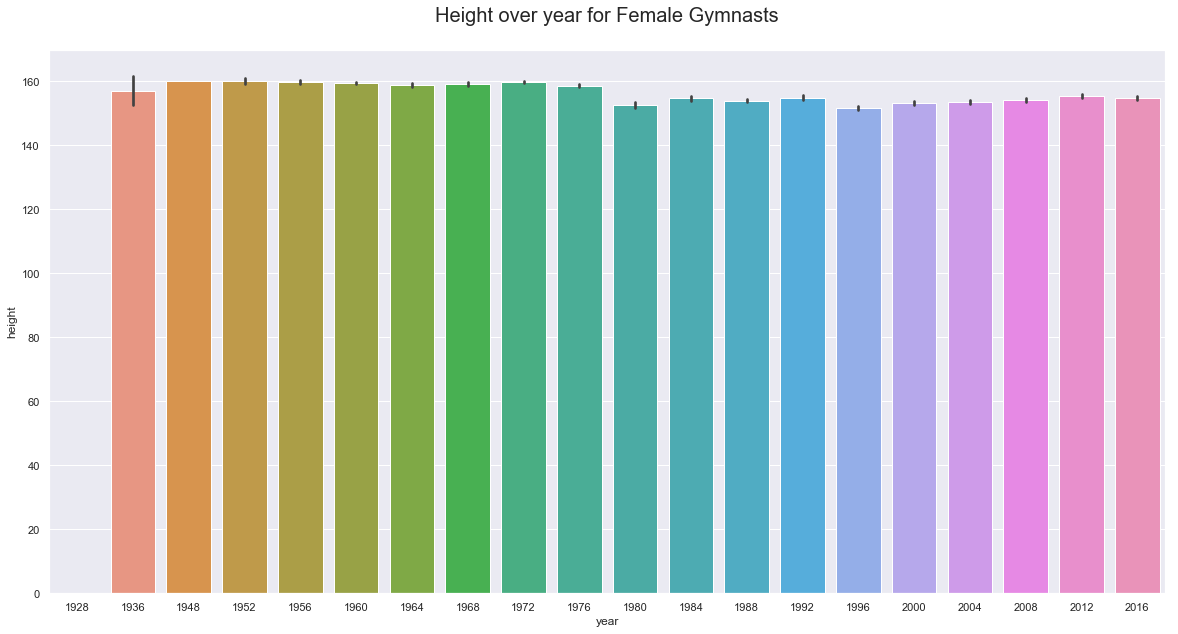

In [92]:
plt.figure(figsize=(20, 10))
sns.barplot('year', 'height', data=gymWomenOverTime)
plt.title('Height over year for Female Gymnasts\n', size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Height", fontsize=15)

### Observation:

- The men weight data from 1924 seems missing. Let's check.
- The weight for female Gymnasts has go down for 60 to 50 kilograms on average.
- The weight for men has been more or less stable since 1964.
- The height is more stable for both men and women.

In [94]:
gymMenOverTime['weight'].loc[gymMenOverTime['year'] == 1924].isnull().all()

True

It seems that we do not have any information about the athletes in 1924.

<a id="section"></a>

<a id="section608"></a>

<a id="section610"></a>
### 6.4.2. Weightlifting

We can start creating a new, dedicated dataframe.

In [97]:
wlMenOverTime = MenOverTime.loc[MenOverTime['sport'] == 'Weightlifting']
wlWomenOverTime = WomenOverTime.loc[WomenOverTime['sport'] == 'Weightlifting']

Let's now create our plot for Male & Female lifters.

Text(0, 0.5, 'Athlete Weight')

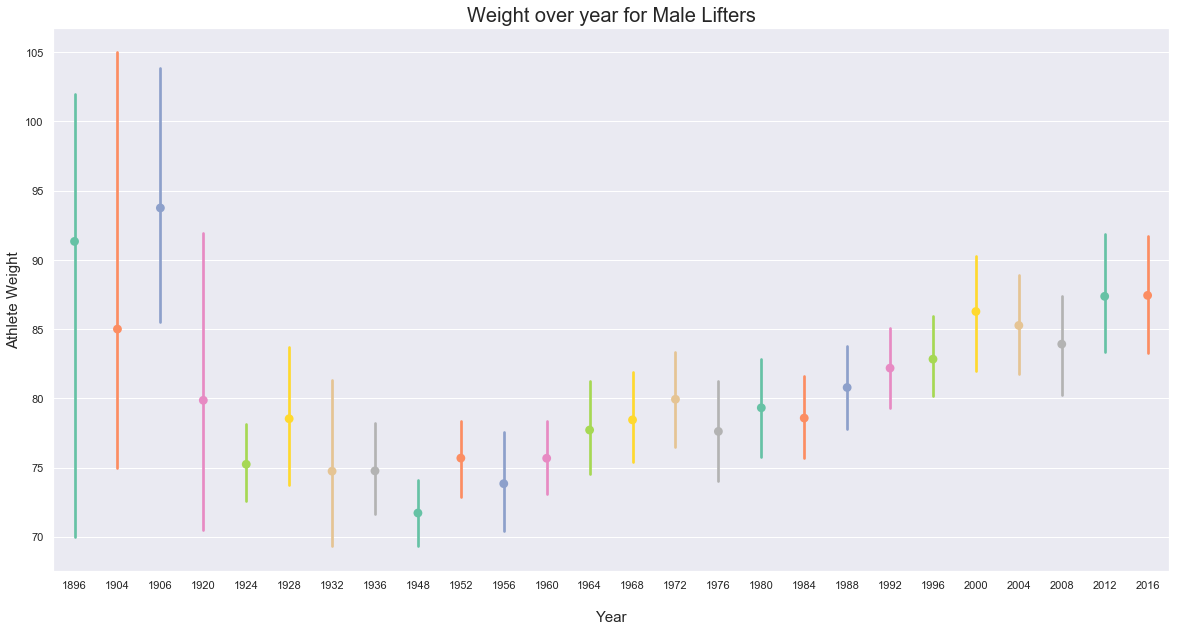

In [99]:
#plot for weight of male lifters 
plt.figure(figsize=(20, 10))
ax = sns.pointplot('year', 'weight', data=wlMenOverTime, palette='Set2')
plt.title('Weight over year for Male Lifters', size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Weight", fontsize=15)

Text(0, 0.5, 'Athlete Height')

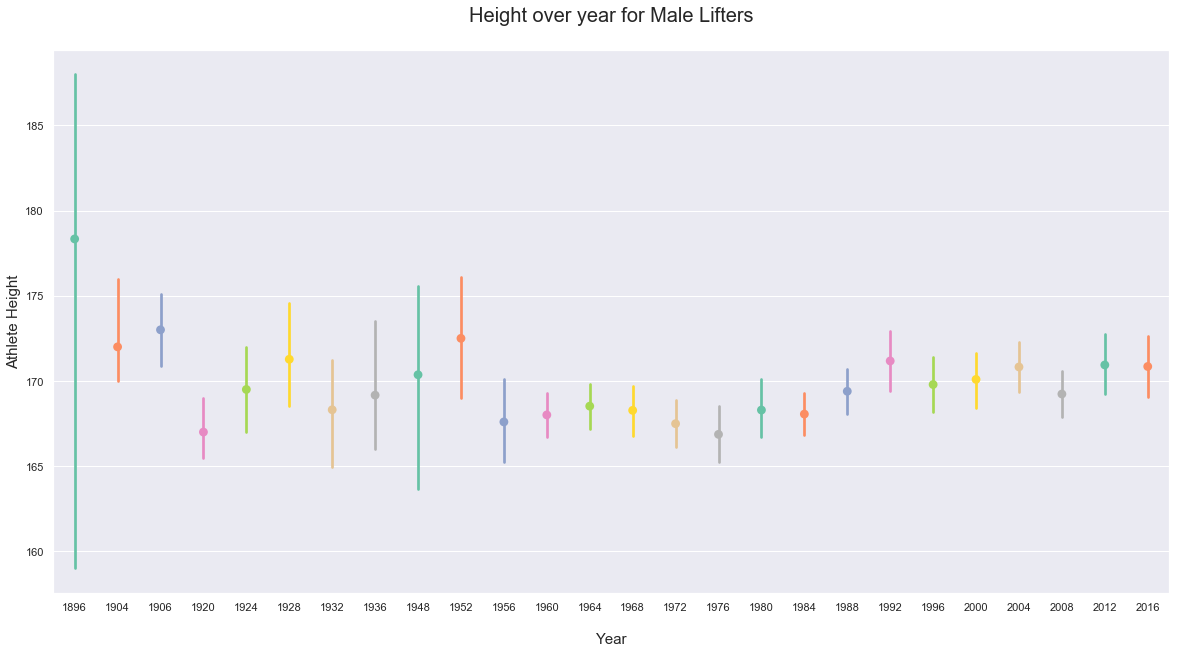

In [103]:
#plot for height for male Lifters

plt.figure(figsize=(20, 10))
ax = sns.pointplot('year', 'height', data=wlMenOverTime, palette='Set2')
plt.title('Height over year for Male Lifters\n', size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Height", fontsize=15)

Text(0, 0.5, 'Athelete Weight')

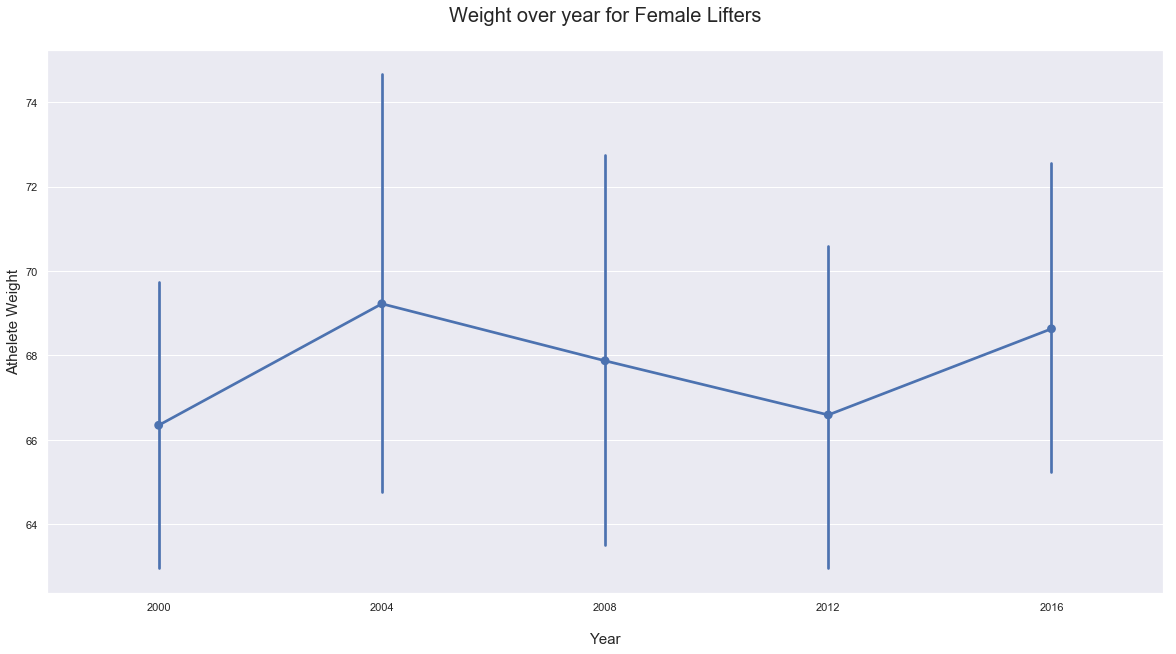

In [104]:
#plot for weight for female lifters

plt.figure(figsize=(20, 10))
ax = sns.pointplot('year', 'weight', data=wlWomenOverTime)
plt.title('Weight over year for Female Lifters\n', size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athelete Weight", fontsize=15)

Text(0, 0.5, 'Athlete Height')

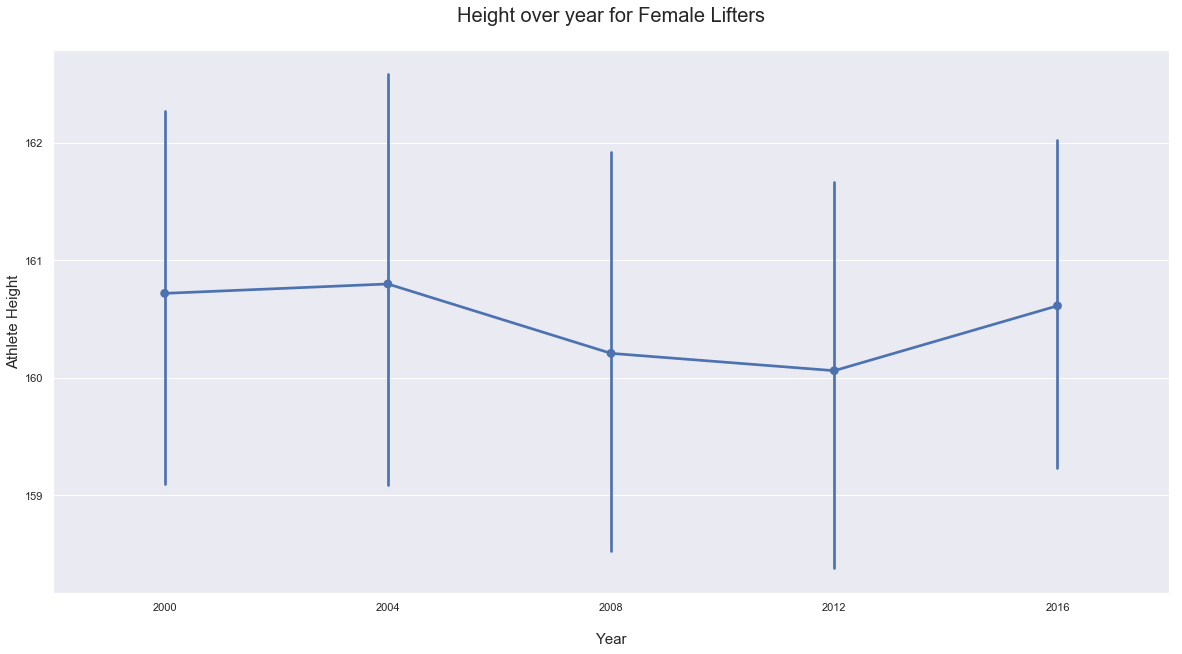

In [106]:
# plot for height for female lifters

plt.figure(figsize=(20, 10))
ax = sns.pointplot('year', 'height', data=wlWomenOverTime)
plt.title('Height over year for Female Lifters\n',size=20)
ax.set_xlabel("\nYear", fontsize=15)
ax.set_ylabel("Athlete Height", fontsize=15)

### Observation:

It seems that we do not have data for female athletes before the 2000 Games.

In [107]:
wlWomenOverTime['weight'].loc[wlWomenOverTime['year'] < 2000].isnull().all()


True

Our observation seems correct.

<a id="section7"></a> 

<a id="section7"></a>
### Conclusion

- The data collected helps up to know __Basic bio data on athletes and medal results from Athens 1896 to Rio 2016.__ ([__From: Section 1.2__](#section102))<br/>

- Total of __271116__ entries were made during the data collection out of which __5538__ contributions were from the _top 3 countries_ in the data collection.

- __82.1% of Athletes for Summer__, __17.9% of Athletes for Winter__ who participated in Olympics respectively.([__From: Section 4.3.1__](#section4031))<br/>

- 1916, 1940 & 1944 __Summer Olympic games__ and 1940 & 1944 __Winter Olympic games didn't happen__ due to the __world wars__. __Neither__ of the world war breaks __affected the athlete participation in the succeeding years__.

- In Winter Olympics, average __age__ of __medal winners__ is __mostly higher__ than the non-medal winners.([__From: Section 4.3__](#section4032))<br/>

- Only the first edition of Olympics didn't have any female athletes. There has been a great improvement in Women representation ever since.
    - __Late 1950s and late 1980s saw significant increase in Women representation__.
    - __Men__ lead the chart when analysis was run down on the basis of Gender representation.([__From: Section 6.1.1__](#section601))<br/>
    
- The __United States__ lead the chart in terms of 
    - Participation in the Olympics followed by _Germany_ and _France_.([__From: Section 5.4__](#section504))<br/>
    - Winning Gold Medal in the Olympics followed by _Russia_ and  _Germany_.([__From: Section 5.3__](#section503))<br/>
    
- From the analyis, it was concluded that __Height, Weight of the athletes, NOC, Team and Region__ were the main parameters _influence the Olympics and thus requiring more Women representation and Medal winning especially for INDIA_.(__Collectively From: 6.1.3, 6.1.4, 6.1.5, 6.4 and 5.3, 5.4__)

<a id="section8"></a>
### Actionable Insights 

- __Attraction of athlete participation__ in Summer Olympics compared to Winter Olympics.
- __Growth in the number of athletes__ for __Summer Olympics__ in recent games.
- __Majority of sports competitions__ in Olympic games for particular season.
- __Saturation point__ in the last 5 Summer games in terms of __number of events__.
- __Growth__ of number of athletes in __Winter Olympics__.
